Why would we want to build a model to predict the value of an output variable? Models provide a way to summarize or describe general patterns in a dataset, and these patterns can be used to estimate future outcomes. For example, we might use modeling to estimate sales growth based on the increase in advertizing budget at a company we work for. Or we could build a model to predict the total cost for an Uber ride based on distance traveled, using data from previous car trips.

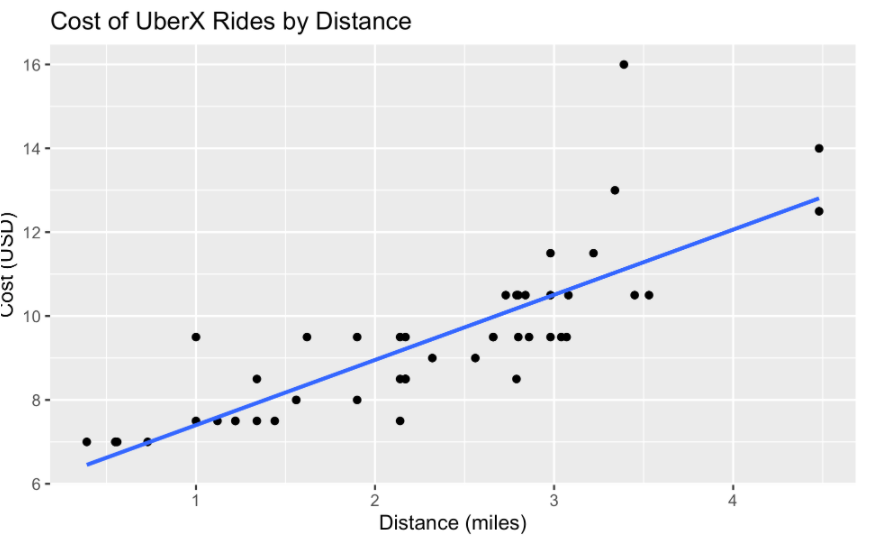

With linear models — or, more specifically, linear regression models — we can model these types of relationships with a straight line. We begin our modeling journey with linear regression because it provides a straightforward approach to predict the value of an output based on the value of an input. 

Whether we are looking to work as a data analyst, a data scientist, or a machine learning engineer, it is important to understand linear regression because this decades-old technique is still useful today.

We'll build a solid understanding of how and when we can use linear regression models to make predictions. We'll build linear regression models, learn how to interpret their output, and assess model accuracy.

We'll discuss the limitations of linear regression models when data is not linear. And we'll use programming tools to fit and visualize many linear regression models at once.

Before we begin to build linear regression models, let's cover fundamental modeling concepts to build our intuition around modeling. Many of the concepts we will cover, apply to predictive models of all types, not just linear regression models. 

If we are interested in machine learning and other types of predictive modeling, this file will provide key foundational knowledge.

To build our intuition around modeling, let's use a motivating example. Let's imagine that we live in the [Brooklyn borough](https://en.wikipedia.org/wiki/Brooklyn) of New York City. We are interested in the real estate market to analyze home sales data.

This diagram shows the location of Brooklyn, and the other boroughs of New York City:

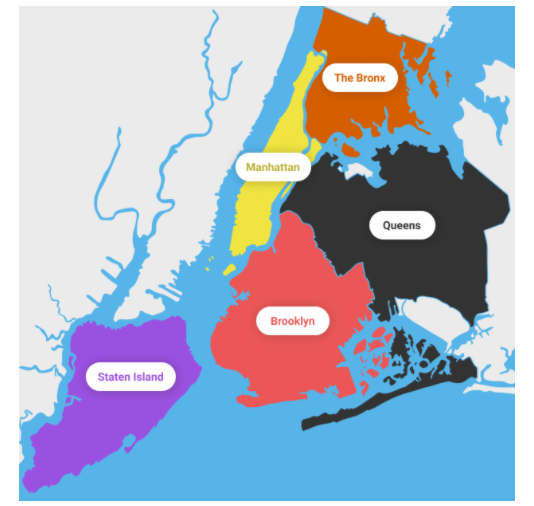

We don't own a car, so one of the main expenses that we incur living in Brooklyn is the cost of using Uber to get around. We've recorded data for 50 recent Uber rides and wonder if it is possible to use this data to build a model to predict the cost of future rides? If we build a model to predict the cost of an Uber ride, maybe then we can figure out how to reduce travel costs in the future.

Now, we will use the terms model and predictive model interchangeably. So what, exactly, do we mean by predictive model? The book ["Applied Predictive Modeling" by Max Kuhn and Kjell Johnson](http://appliedpredictivemodeling.com/) defines predictive modeling as the process of developing a mathematical tool or model that generates an accurate prediction. We find this definition of predictive modeling useful here.

This file focuses on **linear regression** modeling specifically, which is a type of statistical model for predicting, or estimating, an output based on one or more inputs. Later we will attempt to estimate the cost of an Uber trip using only a single input. This is known as **bivariate regression, or simple regression**.

Why would we choose a linear model that uses a straight line when we know there is variation our the data? With an increase in flexibility comes the risk that our model will follow the error — or noise — in the dataset too closely. If the model "works too hard" to find patterns in the data when fitting a model, then the model may not perform well when evaluating unseen data. This is known as **overfitting**.

We will not encounter an overfit model now because bivariate linear regression is, by definition, simple and therefore not prone to overfitting. However, as we build our foundational knowledge of predictive modeling, it is essential to know about overfitting and why it can sometimes be advantageous to choose a simpler model instead of a more complex model that may be at risk of following patterns that do not exist in the unseen data.

We will learn more about the general form of a predictive model. But first let's load our Uber trip data and have a look. The data contains four variables:

* `date`: Day that the Uber trip was taken.
* `destination`: Specific neighborhood in Brooklyn that we traveled to
* `distance`: Total trip distance (in miles).
* `cost`: Total cost of the trip.

This dataset was built using real Uber trip cost data from [this dataset on Kaggle](https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices). The `date` and `destination` data in our dataset are fictitious, but all `distance` and associated `cost` observations are sampled from actual data. 

To build this dataset, we used simple random sampling to extract information for 50 "UberX" trips out of over 55,000 observations. Simple random sampling was also used to randomly generate the `date` and `destination` data. 

The specific neighborhood names for Brooklyn were pulled from [this data on property sales in New York City](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page), which we will work with in later file.

**Task**

1. Load the csv file `uber_trips.csv`. Be sure to load the `readr` package to read-in the data.

**Answer**

`library(readr)
uber_trips <- read_csv("uber_trips.csv")`

Did we see any variables in the `uber_trips` data that might be useful for predicting Uber trip cost? Recall that our goal is to build an accurate model that predicts the cost of a future trip with Uber. To build a model we provide an input variable to explain, or predict, an output variable.

An input — or input variable — is also sometimes referred to as a `predictor`, `independent variable`, `feature`, `attribute, descriptor`, or simply `variable`. We will generally use the terms `input variable`, `predictor variable`, or `independent variable.`

An output or output variable is also known as a `dependent variable`, `outcome`, `response variable`, `response`, `target`, or `class`. We will generally use the terms `output variable`, `response variable` or `dependent variable`.

The general form of a model that performs such a prediction can be represented as:

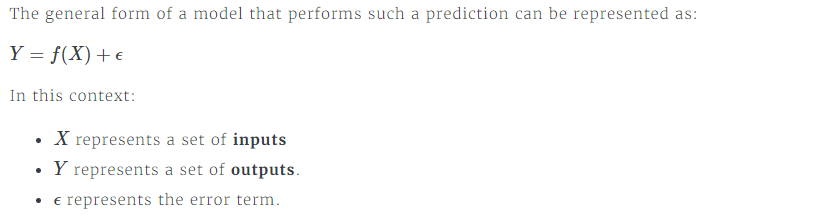

The random error term **ϵ** is independent of **X** and has a mean of approximately zero. We'll learn more about the error term later. For now, let's discuss terminology about inputs and outputs.

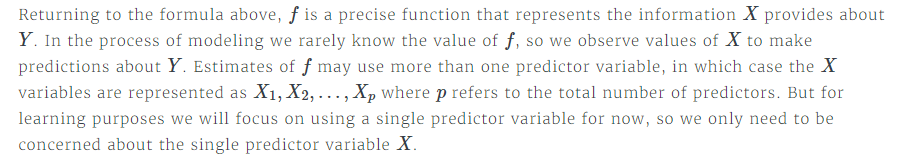

In our example above, **Y** represents the cost of an Uber trip, which is considered a quantitative response to an input variable. Bivariate regression can be performed with pairs of variables measured on a ratio or interval scale. 

Which variables from our `uber_trips` data are either ratio or interval? The only variable that is not either interval or ratio scale data is **destination**.

Let's plot our data to see if any of our variables might be suitable to predict the cost of future Uber trips.

`# Line plot example
ggplot(data = df, 
       aes(x = independent_variable, y = dependent_variable)) +
  geom_line()`

`# Scatterplot example
ggplot(data = df, 
       aes(x = independent_variable, y = dependent_variable)) +
  geom_point()`

**Task**

Generate two plots with `ggplot2`. Include `cost` on the y-axis in each plot, because we are treating this as the dependent variable. In each case, a simple exploratory plot is fine. There is no need to customize axis labels or chart titles.

* Generate a line plot with `cost` on the y-axis and `date` on the x-axis.
* Generate a scatter plot with `cost` on the y-axis and distance on the x-axis.

**Answer**

`library(ggplot2)`

`ggplot(data = uber_trips, 
       aes(x = date, y = cost)) +
  geom_line()`

`ggplot(data = uber_trips, 
       aes(x = distance, y = cost)) +
  geom_point()`

Looking at the two plots we generated, we observe that there does not appear to be any obvious relationship between `cost` and `date`, but there is a relationship between `cost` and `distance`.

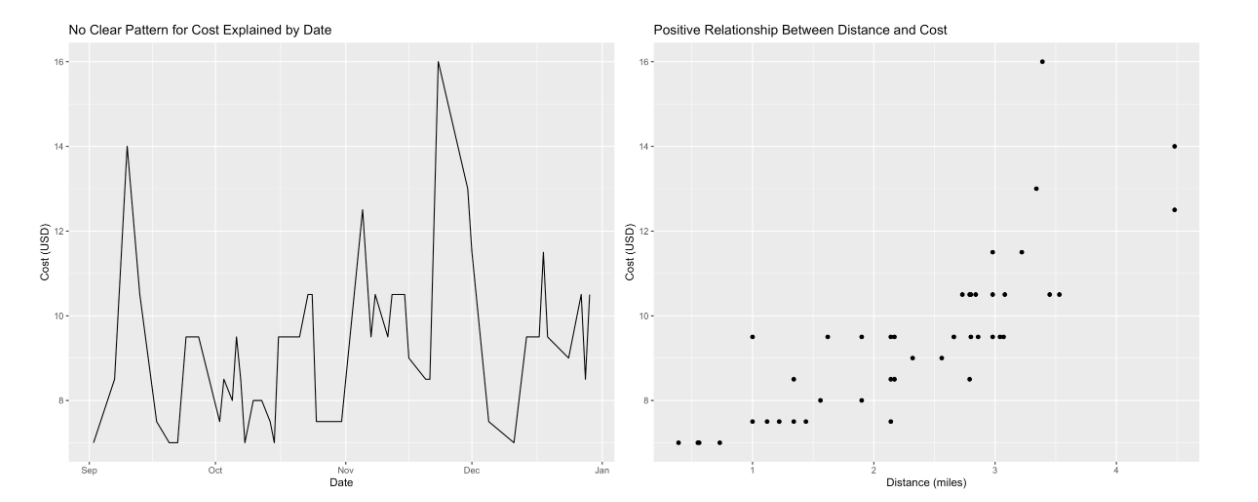

Let's break-down each plot individually. With regards to `date`, suppose we take an Uber trip from our home to the same destination every day. We would expect that this trip would cost rougly the same each time. Sure there could be some variation day-to-day because of traffic levels, weather, or driver habits, for example, but overall we would expect the costs to be relatively consistent. The line chart we generated does not demonstrate any sort of stability or trend, something else must be influencing trip cost.

On the other hand, looking at the scatterplot of `cost` and `distance` we see that, in general, trips that are a greater distance have a higher cost than trips of a shorter distance. This is an example of a situation where we have two variables that appear to have some sort of a relationship. We may be able to build a model that provides a resonable estimate of `cost` based on `distance`. As stated previously, our goal is to build an accurate model that predicts trip cost on the basis of trip distance. Is prediction the only reason that we would want to build a model?

Modeling is generally performed for one of two purposes: **prediction** or **inference**. Let's begin with prediction.

If our primary purpose of building a model is to generate an accurate prediction, we aren't too concerned if the function form of `cost` explained by `distance` is unknown. In other words, rather than understanding the intricacies of *$f$*, our primary concern is that our model gives us accurate predictions for `cost` for each input **X**. This is the main point to convey about prediction!

In the real world, we will often encounter situations where we have **X** inputs available, but we do not have information available for **Y**. Take, for example, our hypothetical situation of living in Brooklyn and frequently using Uber to get around.

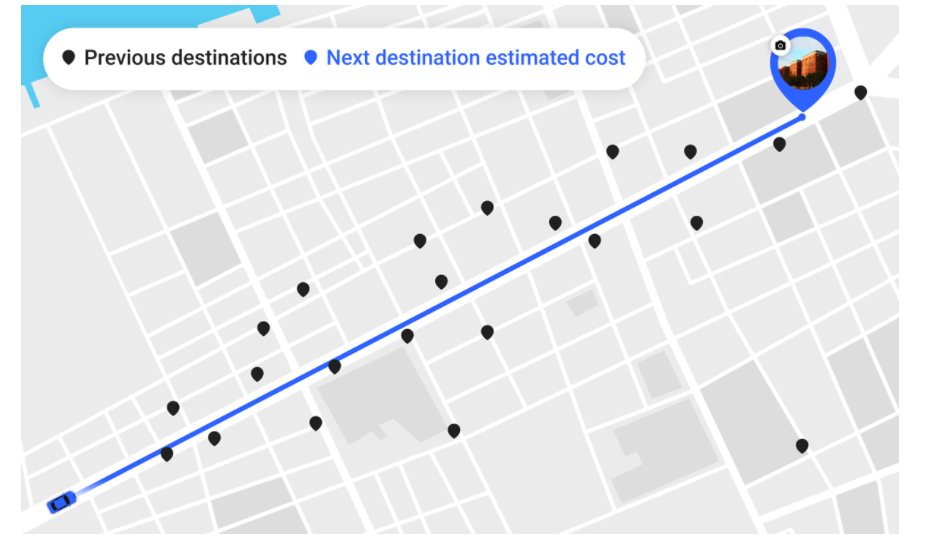

Suppose, in an effort to reduce trip cost, we are planning our routes for the week to minimize distance traveled from location to location. We can estimate the total cost 
**Y**
 for each planned trip of 
**X**
 distance, based on the data we have previously collected. In this situation, we predict 
**Y**
 with:
 
 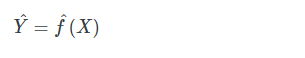

We can omit the error term because it averages to 
**0**
.  "hat" symbol indicates an estimate. We can formulate an estimate of 
**Y**
 with an estimate of 
**f**
 using our 
**X**
 inputs. Technically, we are also estimating 
**X**
 — our drivers could take a different route than the online map service suggested — but let's assume that our routes are travelled exactly as planned. So, if we know 
**X**
, does that mean our estimates of 
**Y**
 will be exact? That is rarely the case. Why? Because of error! We'll discuss error in a moment, but first, let's learn about inference.

Inference refers to situations where we want to understand the relationships between 
**X** and **Y**. For example, we might ask which independent variables we measure are associated with the response variable?

When motivated by inference, we may or may not be interested in generating predictions for **Y**. Instead, we wish to understand $f$ and how **Y** is affected by changes in **X**. In our example, inference questions might include:

* How does the `distance` affect `cost`?
* How do traffic levels affect `cost`?
* How does the total trip time `cost`?
* How does the date affect `cost`?
* Does a linear model adequately describe the relationship between the input variable we select and `cost`?
* Is `distance` our best single predictor of total trip cost using the information we have available?
* How much of an increase in trip cost is associated with an increase of one mile in trip distance?

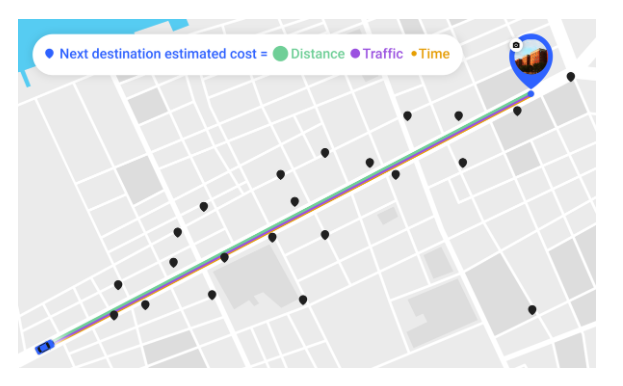


In contrast, a prediction question might be: What is the total cost of traveling 2.5 miles from Sunset Park to Prospect Park?

Modeling can also be performed for some combination of prediction and inference. If accurate prediction is our goal in bivariate linear regression, it is critical to select the best single predictor for our model. In our case, we do not have many variables to choose from. When we analyzed our plots above, did we infer that date is probably not a good predictor of `cost`?

As we progress beyond linear regression to models that our more complicated, inference may become more difficult. There is often a trade-off between prediction accuracy and interpretability. Linear models are widely used today, in part because they are generally more interpretable than more complex models. But more complex models may provide more accurate predictions, especially when the data is not linear.

**Task**


For each question below, state whether the question is for the purpose of prediction, or inference.

1. Does our data contain any variables that demonstrate a negative relationship with `cost` (in other words, we observe an increase in `cost` and a decrease in value for a given variable)?
    * Assign the string value "prediction" or "inference" to the object `question_1`.
2. How much will it cost to travel from the Bushwick neighborhood to Marine Park?
    * Assign the string value "prediction" or "inference" to the object `question_2`.
    
    
**Answer**

`question_1 <- 'inference'
question_2 <- 'prediction'`

As mentioned briefly when we learned about prediction, it is near impossible for a model to be 100% accurate because of error. **Error** refers to the deviation of an observed value from the unobservable true value of the quantity of interest. Specifically, the accuracy of our prediction for `cost` depends on two types of error: **reducible error**, and **irreducible error**.

In this example we can minimize reducible error in our linear regression model by choosing the predictor (e.g.` distance`) that provides the best estimate of `cost`. With the data available to us here we can't do any better than choosing the `distance` variable. One way we could potentially reduce error is to use a different statistical model that provides a better estimate of $f$. But first we need to master linear regression, so we'll stick to that approach for now!

Examples of irreducible error include variables that are not measured but contain useful information for predicting 
**Y**
. In our case these unmeasured variables could be characteristics of driver habits, traffic levels, weather conditions, time of day, surge pricing, or road construction levels. If we don't measure an input useful for predicting 
**Y**
, we can't estimate it! Error is independent of 
**X**
 and cannot be predicted using 
**X**
.

Unmeasurable variation also contributes to error. Another term for this is random noise. In our case examples of this might include the driver's mood on a particular day, or the driver's ability to find a suitable place to stop at dropoff location. So even if we are able to bring our reducible error to zero, the accuracy of any modeling prediction will always be bound by the amount of irreducible error present. Irreducible error is out of our control. To build an accurate model, our goal is to estimate 
$f$
 in a manner that minimizes reducible error for the particular statistical technique that we choose.

Which x-axis variable (`date` or `distance`) from the two plots that we generated earlier will likely have the greatest amount of error if we apply a linear regression model to estimate `cost`?

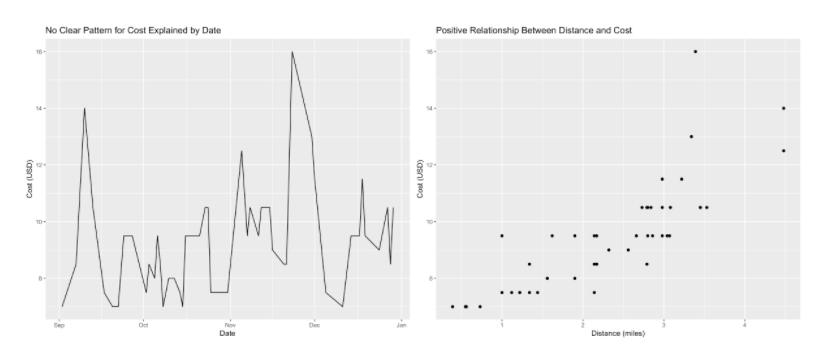

**Task**

1. Examine the two plots we generated above and select the plot that shows the x-axis variable (`date` or `distance`) that will likely result in the greater amount of error if we perform a linear regression to estimate cost.
2. Assign either the value `'scatter_plot'` or `'line_chart'` to the variable.

**Answer**

`greater_error <- 'line_chart'`

What steps do we take to estimate 
$f$
? Regardless of the type of modeling approach we choose, there are some common steps we take to estimate the function that uses 
**X**
 to describe 
**Y**
. With any model, we observe 
**n**
 different data points, where 
**n**
 refers to the number of observations we have in the dataset. 
 
In our case, we have information about the 50 Uber rides we recorded data for. This dataset is called the training data, because we will use these observations to train our model how to estimate 
$f$
.

To provide a more specific example, let's explore how we estimate 
$f$
 using linear regression, which is a type of parametric model. The term parametric refers to parameter. In the case of linear regression, we are able to formulate an estimate of 
$f$
 by estimating two parameters: `intercept` and `slope`. We may have referred to these paramaters as coefficients. The bivariate linear model is represented mathematically as:
 
 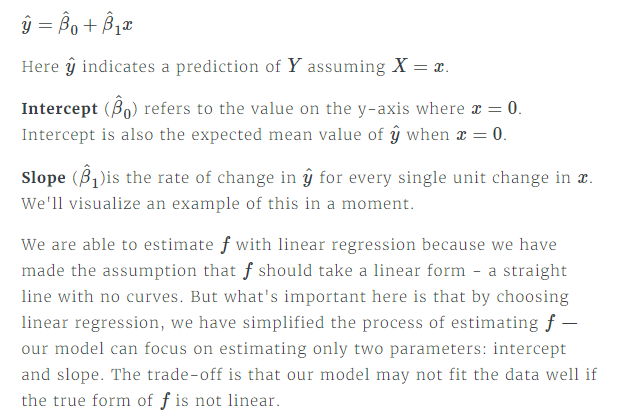

In the case of linear regression, 
$f$
 is estimated using what is known as the least squares estimate (sometimes abbreviated LSE) to fit the model to the training data. We'll learn how the least squares estimate works later, but the main thing to understand here is that the result of "training" the least squares method to our data is a value for intercept and slope that provides the "closest" or "best" fit to the 50 data points using a straight line. 
 
let's think about best fit while we look at the scatterplot we generated:

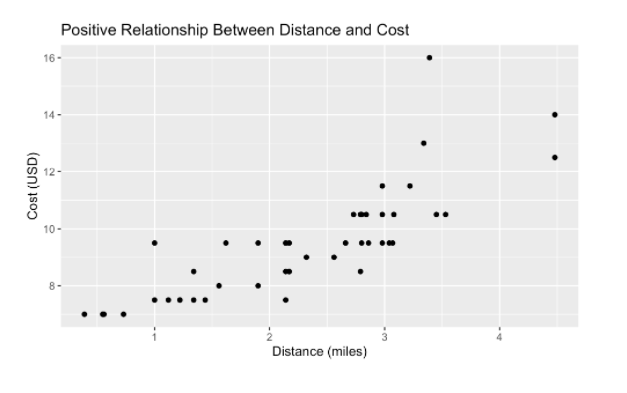

Take a look at the pattern of the points in the scatterplot above. We observe that there is the general pattern: with an increase in `distance` comes an increase in `cost`. 

With this pattern in mind, imagine drawing a straight line through the points in such a way that the line is as close as possible to each of the 50 points at once. With the line that fits best, some points will be above the line, some will fall below the line, and a few points might fall on the line, or very close to it. Maybe something like this?:

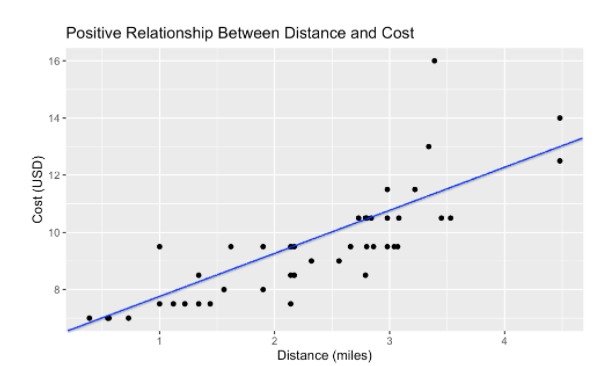

To be clear, the line drawn above is not the true regression line. It's a rough guess based on the spread of the points. If this seems difficult to imagine, don't worry, it is! Fortunately, `ggplot2` can do this for us, and we don't even need to build a linear model first.

Using the [`geom_smooth()` function](https://ggplot2.tidyverse.org/reference/geom_smooth.html) from `ggplot2`, we can visualize a linear model on the scatterplot we previously built. We don't need to be concerned with the details of fitting this linear model at this moment, we'll get to that later. For now, let's continue to build our intuition around predictive modeling.

**Task**

In this exercise, we will add a linear regression fit line to the scatterplot we built earlier. To do this, we will add the `geom_smooth()` layer to our plot. Include `distance` on the x-axis and `cost` on the y-axis as before. We've included the code from our original scatterplot in the display code.

1. Generate a scatterplot that visualizes a linear regression model.
    * Add `geom_smooth()` to the scatterplot we built previously.
    * Within `geom_smooth()` enter the arguments: `method = "lm", se = FALSE`.
    
The argument `se = FALSE` is used to specify that we do not want to show confidence intervals in our plots. Once we've generated the plot, compare how the fit line compares to what we imagined.

**Answer**

`ggplot(data = uber_trips, 
       aes(x = distance, y = cost)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)`

Below is the scatterplot with the linear regression line that we generated with `ggplot2`. 
In this example, we see that a linear model is a reasonable choice to explain the relationship between distance and cost. How does this compare to the trend line we imagined?

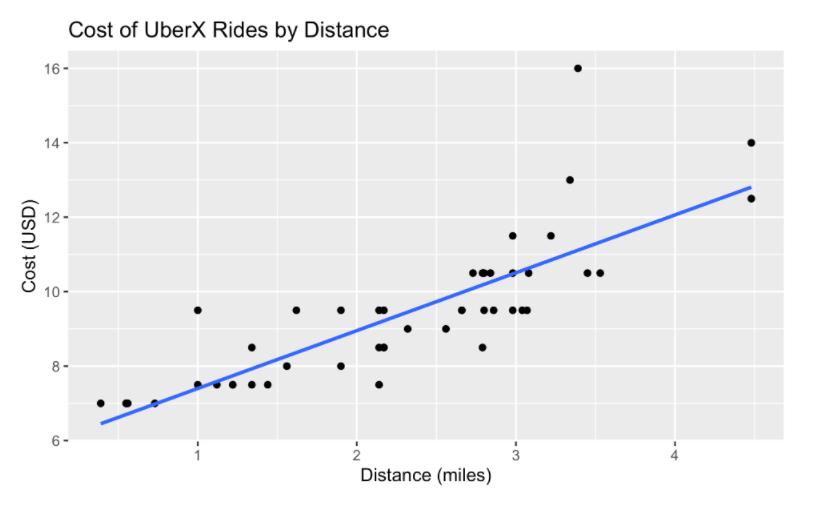

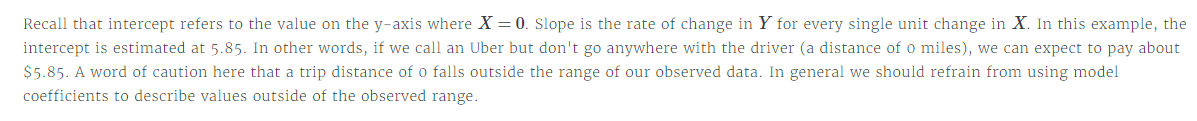

The slope is estimated at 1.55, meaning that we can expect our Uber trip cost to increase by about $1.55 for every mile we travel. We have an estimate for these two coefficients that we share here, because we performed a linear regression of `cost` onto `distance`.

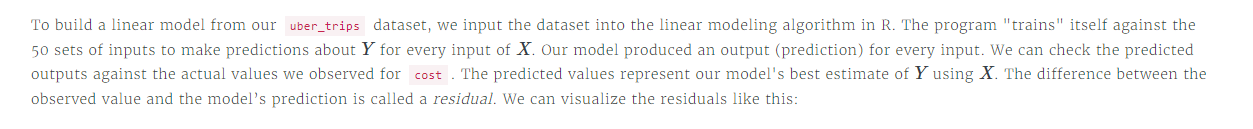

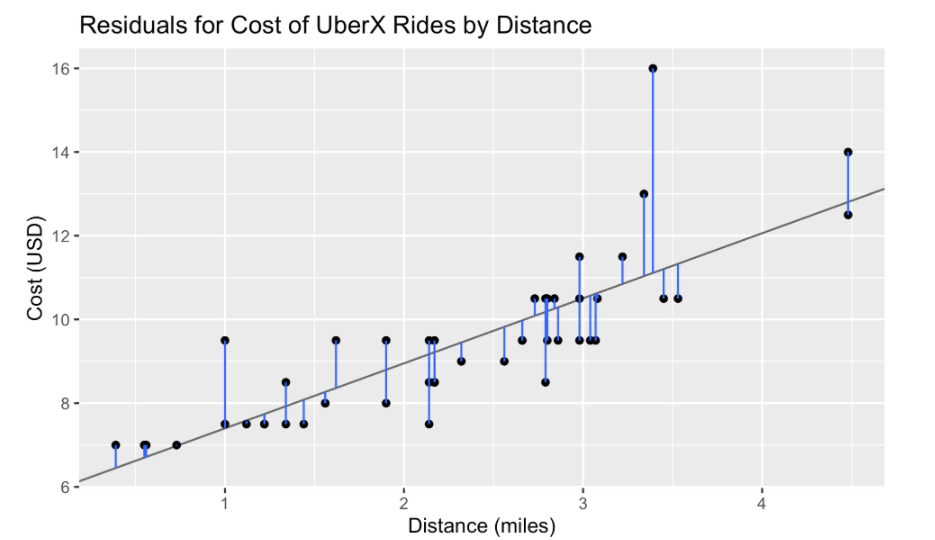

In the scatterplot above, the residuals are represented by the blue lines that connect the observations to the fit line. These blue lines represent the distance on the y-axis that the observed value differs from the predicted value. 

We can calculate the residual for every point in our dataset and use these values to assess the accuracy of our model. If our model does a good job of predicting trip cost for every trip distance traveled, then our residuals will be relatively small. On the other hand, if our model does not predict trip cost well, then our model is a poor estimator and the residuals will be relatively large.

It can be useful to visualize the residuals to see where our model poorly performs or does well. For example, looking at the plot above, we see that our model generally underestimates the true cost of Uber trips that are one mile or less.

But visualizing the residuals does not allow us to quanitify the quality of the fit. We need to use a summary measure to quantify the extent to which the predicted trip cost matches the true trip cost for a given car trip. 

Fortunately, statisticians have developed various summary measurements that can take the residuals from our model and transform them into a single value that represents the predictive ability of our model. We will work in-depth with a few of these methods later , but for now, let's focus on the simplest regression error metric:` Mean absolute error (MAE)`.

The mean absolute error (MAE) measures the average amount that the observed outputs vary from the predicted outputs. Using our Uber trip example, MAE represents the average amount of money that our outputs for `cost` varied from the prediction. 

To estimate MAE, we begin by calculating the [absolute value](https://en.wikipedia.org/wiki/Absolute_value) for each residual in our dataset. We use the absolute value of the residuals here. 

An absolute value is often used in mathematics to represent distances and, as we've learned, the residual is the distance between the observed and the fitted values. We care only about the magnitude of the residual, and not whether it is positive or negative. 

Next, we calculate the average of all of the residuals. This value is the MAE. The MAE essentially describes the typical magnitude of the residuals. The equation for MAE looks like this:

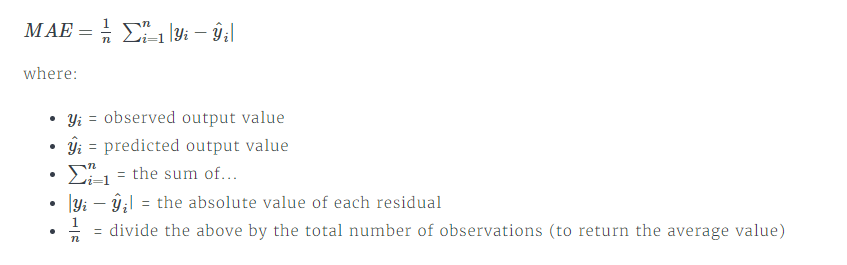

Let's break down how to compute MAE in R:

1. Perform a linear regression
    * We'll show how to do this later 

2. Calculate the absolute value of the residuals
    * In R, we do this by calling the [`abs()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/MathFun.html) on the variable that contains the residuals for our model.
    * Residuals are available as a standard output of a linear regression model in R, so we don't have to calculate the difference between the observed and predicted values.
3. Sum the residuals

4. Divide the sum by `n`, the number of data points

Notice that summing the residuals and dividing the sum by the number of data points is calculating the average. This can be achieved in R with the [`mean()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/mean.html). So, assuming we have performed a linear regression on our data, we calculate MAE in R as follows:

`MAE <- mean(abs(df$residuals))`

Because MAE is derived from the residuals, a small MAE indicates our model is accurate, whereas a large MAE indicates our model may not fit well in certain areas. If our model perfectly predicts the cost of our upcoming Uber trips, then our MAE would be 
$0$
, but this rarely happens.

The MAE is the easiest summary measure to estimate, which is why we covered it briefly here, but using the absolute value of the residual is often less desirable than performing additional operations such as squaring this difference. We'll explore regression error metrics in more detail later.

**An important note about terminology**: Even though the "E" in MAE stands for error, it does not refer to the epsilon error! The error described in MAE (and other summary statistics) refers to the residuals. We can read more about these two closely related measures [in this Wikipedia post](https://en.wikipedia.org/wiki/Errors_and_residuals).

Before we begin an exercise, let's quickly recap what we've learned about residuals and MAE.
* We started by creating a scatterplot of `distance` and `cost`. 
* We added a linear regression fit line to the scatterplot with `ggplot2`. 
* We haven't built a linear model in R yet but we know that the fit line represents the best estimate of using distance to estimate cost.
* The difference (on the y-axis) between our observed value for cost and the fit line is the residual value. 
* We estimate MAE by averaging the absolute value for all residuals.

For this exercise, we will calculate the MAE. If we get stuck, think back to this plot. What we'll estimate is essentially the average length of the blue lines:

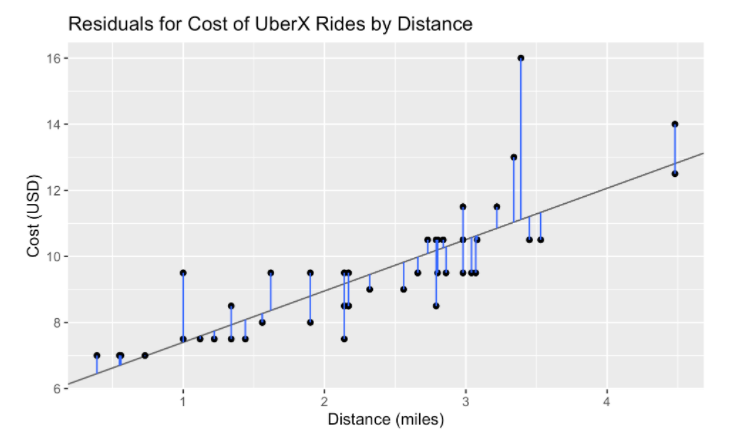

**Task**

We have performed a linear regression of `cost` onto `distance` and have provided the predictions as the `predictions` variable and the residuals as the `residuals` variable in the file titled `uber_trips_lm.csv`. 

1. Load the `uber_trips_lm.csv` into R.
2. Calculate the mean absolute error .
3. Evaluate the following statement and assign the best answer `TRUE` or `FALSE` to the variable `MAE_question`: 
    * Based on the MAE result we calculated, we can say roughly that, `cost` predicted by `distance` is inaccurate by about $0.72, on average.

**Answer**

`uber_trips_lm <- read_csv("uber_trips_lm.csv")
MAE <- mean(abs(uber_trips_lm$residuals))
MAE_question <- TRUE`

In this file,  we learned about some of the concepts that are fundamental to predictive models of all kinds, not just linear models. 

It is nearly impossible for a model to be 100% accurate because of error. Some level of error is out of our control and will always exist in any model, but we learned that we can reduce error by selecting a modeling technique that provides the best fit to the data. Or, in the case of bivariate linear regression, we reduce the error as much as possible by selecting the predictor varriable that provides the best estimate of the response variable.

By choosing linear regression, we simplify the process of estimating 
**f**
, because our model can focus on estimating only two parameters: Intercept and slope. The trade-off we face is that our model may not fit the data well if the true form of 
**f**
 is not linear. 
 
 Fortunately for us, predicting Uber trip cost based on trip distance looks to be relatively well described by a linear model.

Once we've trained a model, we can check the fit of the model against our training data. We can we can compare the predicted cost for each Uber trip, and compare it to the recorded cost of each trip. This quantifiable difference between the observed value and the model’s prediction is called a residual. 

The residuals can be analyzed and collapsed into a useful summary measure like mean absolute error, which is essentially the average distance that the observed output values differ from the predicted values.

We won't need to worry about overfitting any models. But as we progress into using more complex models that require a greater number of predictor variables we will need to be mindful of overfitting to ensure that our model follows true patterns in the data instead of random noise that is unique to the training data.